In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('BerlinCrime.csv')

In [3]:
df

,Year,District,Code,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
0,2012,Mitte,10111,Tiergarten Süd,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032
1,2012,Mitte,10112,Regierungsviertel,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870
2,2012,Mitte,10113,Alexanderplatz,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435,3108
3,2012,Mitte,10114,Brunnenstraße Süd,52,25,254,60,66,1916,86,192,396,131,14,5,428,122,213,752
4,2012,Mitte,10221,Moabit West,130,51,629,185,199,2470,94,410,325,161,42,22,516,64,259,1403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2019,Reinickendorf,123012,Nord 2 - Waidmannslust/Wittenau/Lübars,34,19,372,85,123,1160,30,135,150,93,16,3,306,74,110,728
1196,2019,Reinickendorf,123021,MV 1 - Märkisches Viertel,42,22,491,123,187,1100,51,224,76,40,39,19,286,11,73,986
1197,2019,Reinickendorf,123022,MV 2 - Rollbergsiedlung,6,4,84,19,34,293,13,36,18,34,5,2,156,56,21,212
1198,2019,Reinickendorf,123043,West 3 - Borsigwalde/Freie Scholle,8,4,95,18,43,492,21,96,69,38,6,1,79,8,31,218


In [4]:
# Counts of each crime in each district
#district_overview  = df.groupby(df['District']).sum()
district_overview  = df.groupby('District', as_index=False).sum()
district_overview.drop(['Year', 'Code'], axis=1, inplace=True)
district_overview= district_overview.reset_index(drop=True)

In [5]:
district_overview

,District,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
0,Charlottenburg-Wilmersdorf,4220,2039,31931,7797,11380,210033,5821,32476,26447,10606,1313,593,29329,6364,8425,80844
1,Friedrichshain-Kreuzberg,6748,4310,37719,12220,9244,213388,3667,22486,32462,6605,2072,741,40089,10108,31683,88644
2,Lichtenberg,1890,1057,21001,4525,6431,99402,5251,17003,13868,4445,1439,572,22543,5046,3530,48782
3,Marzahn-Hellersdorf,1981,1090,24198,4576,7330,76041,4500,13861,8295,3735,1651,532,22738,4714,3086,48691
4,Mitte,7582,4225,59628,15730,17130,328450,4186,34665,33574,9915,2372,900,45457,10982,26445,126407
5,Neukölln,4659,2545,32239,9261,11477,161622,4083,25428,15568,8861,1903,854,32975,5321,12253,82737
6,Pankow,2581,1304,23057,5409,8165,167927,5732,22013,34665,7911,1654,661,33486,9701,4832,69960
7,Reinickendorf,2385,1171,22514,5333,9137,99013,2754,18202,9876,6784,1354,516,20899,4022,7300,52325
8,Spandau,2314,1193,22670,5318,8378,89812,2590,13146,8555,4396,1348,544,20004,2796,4163,52355
9,Steglitz-Zehlendorf,1624,794,13871,2720,6476,101487,3901,19679,16389,8247,1144,431,20879,5108,3116,37167


In [6]:
district_overview

district_overview['Total']= district_overview.sum(axis=1)
district_overview = district_overview.sort_values('Total')
district_overview

,District,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,Total
3,Marzahn-Hellersdorf,1981,1090,24198,4576,7330,76041,4500,13861,8295,3735,1651,532,22738,4714,3086,48691,227019
11,Treptow-Köpenick,1571,859,16893,3681,6080,90453,4241,15510,16758,4346,1274,592,21778,5576,3633,39928,233173
8,Spandau,2314,1193,22670,5318,8378,89812,2590,13146,8555,4396,1348,544,20004,2796,4163,52355,239582
9,Steglitz-Zehlendorf,1624,794,13871,2720,6476,101487,3901,19679,16389,8247,1144,431,20879,5108,3116,37167,243033
2,Lichtenberg,1890,1057,21001,4525,6431,99402,5251,17003,13868,4445,1439,572,22543,5046,3530,48782,256785
7,Reinickendorf,2385,1171,22514,5333,9137,99013,2754,18202,9876,6784,1354,516,20899,4022,7300,52325,263585
10,Tempelhof-Schöneberg,3525,1906,25880,5930,9872,153141,4281,23861,20791,7536,1665,602,27722,5723,8965,67059,368459
6,Pankow,2581,1304,23057,5409,8165,167927,5732,22013,34665,7911,1654,661,33486,9701,4832,69960,399058
5,Neukölln,4659,2545,32239,9261,11477,161622,4083,25428,15568,8861,1903,854,32975,5321,12253,82737,411786
0,Charlottenburg-Wilmersdorf,4220,2039,31931,7797,11380,210033,5821,32476,26447,10606,1313,593,29329,6364,8425,80844,469618


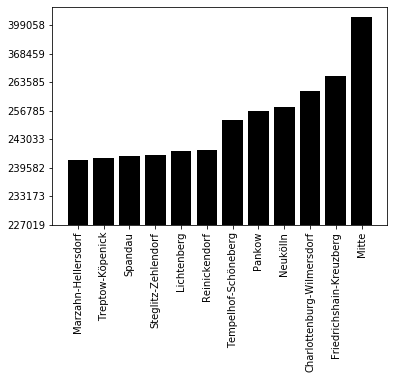

In [7]:
fig, ax = plt.subplots()
ax.bar(district_overview['District'],
        district_overview['Total'],
        color='black')
ax.set_xticklabels(district_overview['District'], rotation=90)
ax.set_yticklabels(district_overview['Total'])
plt.show()

In [8]:
#normalizing the data by the area of the districts

Areas = []

Areas = Areas.append({'Charlottenburg-Wilmersdorf': '64.72','Friedrichshain-Kreuzberg':'20.16', 'Lichtenberg':'52.29',
          'Marzahn-Hellersdorf': '61.74','Mitte':'39.47','Neukölln':'44.93',
          'Pankow':'103.01','Reinickendorf':'89.46','Spandau':'91.91','Steglitz-Zehlendorf':'102.50',
          'Tempelhof-Schöneberg': '53.09', 'Treptow-Köpenick':'168.42'})

In [9]:
AreasD = pd.DataFrame(Areas)


In [10]:
Areas = [{'Charlottenburg-Wilmersdorf': '64.72','Friedrichshain-Kreuzberg':'20.16', 'Lichtenberg':'52.29',
          'Marzahn-Hellersdorf': '61.74','Mitte':'39.47','Neukölln':'44.93',
          'Pankow':'103.01','Reinickendorf':'89.46','Spandau':'91.91','Steglitz-Zehlendorf':'102.50',
          'Tempelhof-Schöneberg': '53.09', 'Treptow-Köpenick':'168.42'}]
Areasdf = pd.DataFrame(Areas)
Areasdf = Areasdf.T
Areasdf.columns = ['Area']
Areasdf = Areasdf.reset_index(drop=False)
Areasdf.columns= ['District','Area']
Areasdf

,District,Area
0,Charlottenburg-Wilmersdorf,64.72
1,Friedrichshain-Kreuzberg,20.16
2,Lichtenberg,52.29
3,Marzahn-Hellersdorf,61.74
4,Mitte,39.47
5,Neukölln,44.93
6,Pankow,103.01
7,Reinickendorf,89.46
8,Spandau,91.91
9,Steglitz-Zehlendorf,102.50


In [11]:
DO = pd.merge(district_overview, Areasdf, on='District')
DO

,District,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,Total,Area
0,Marzahn-Hellersdorf,1981,1090,24198,4576,7330,76041,4500,13861,8295,3735,1651,532,22738,4714,3086,48691,227019,61.74
1,Treptow-Köpenick,1571,859,16893,3681,6080,90453,4241,15510,16758,4346,1274,592,21778,5576,3633,39928,233173,168.42
2,Spandau,2314,1193,22670,5318,8378,89812,2590,13146,8555,4396,1348,544,20004,2796,4163,52355,239582,91.91
3,Steglitz-Zehlendorf,1624,794,13871,2720,6476,101487,3901,19679,16389,8247,1144,431,20879,5108,3116,37167,243033,102.50
4,Lichtenberg,1890,1057,21001,4525,6431,99402,5251,17003,13868,4445,1439,572,22543,5046,3530,48782,256785,52.29
5,Reinickendorf,2385,1171,22514,5333,9137,99013,2754,18202,9876,6784,1354,516,20899,4022,7300,52325,263585,89.46
6,Tempelhof-Schöneberg,3525,1906,25880,5930,9872,153141,4281,23861,20791,7536,1665,602,27722,5723,8965,67059,368459,53.09
7,Pankow,2581,1304,23057,5409,8165,167927,5732,22013,34665,7911,1654,661,33486,9701,4832,69960,399058,103.01
8,Neukölln,4659,2545,32239,9261,11477,161622,4083,25428,15568,8861,1903,854,32975,5321,12253,82737,411786,44.93
9,Charlottenburg-Wilmersdorf,4220,2039,31931,7797,11380,210033,5821,32476,26447,10606,1313,593,29329,6364,8425,80844,469618,64.72


In [12]:
# Finding correlation between total number of offenses and the size of each district in square km.

DO.Area = DO.Area.astype(float)
DO['Total'].corr(DO['Area'])

-0.5699875626357345

It is a moderate negative correlation, which means that the area of the district does to some extend affect the number of crimes. That is, larger areas tend to have less crime, could  be interpreted as a consequence of their geographical layout and population density. Whilst central areas like Mitte and Friedrichschein-Kreuzberg are very densely populated, areas like Treptow-Köpenick or Spandau have lot of green spaces, lakes, etc.  


Text(0.5, 1.0, 'Scatter plot of crimes and area of each district')

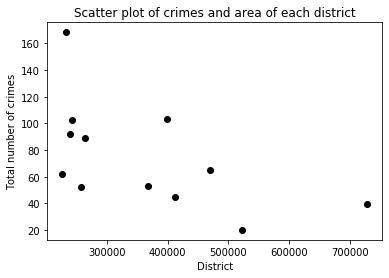

In [13]:
# Visualising the relationship of crimes and district sizes
x = DO['Total']
y = DO['Area']
plt.scatter(x,y, color = 'black')
plt.xlabel('District')
plt.ylabel('Total number of crimes')
plt.title("Scatter plot of crimes and area of each district")

In [14]:
population = pd.read_excel('BerlinPopulationFinal.xlsx')
population.head()


,Citizenship,Year,Sex,Age,District,Count
0,German,2019,male,below 10,Berlin,155868.0
1,German,2019,male,10 to 19,Berlin,132260.0
2,German,2019,male,20 to 29,Berlin,157631.0
3,German,2019,male,30 to 39,Berlin,227469.0
4,German,2019,male,40 to 49,Berlin,181662.0


In [15]:
population.dtypes

Citizenship     object
Year             int64
Sex             object
Age             object
District        object
Count          float64
dtype: object

In [16]:
population_overview = population.drop(columns = ['Age','Sex','Citizenship'])

population_overview = population_overview.groupby(['Year', 'District'], as_index=False).agg({"Count": "sum"})

population_overview.head()

,Year,District,Count
0,2012,Berlin,3469621.0
1,2012,Charlottenburg-Wilmersdorf,319289.0
2,2012,Friedrichshain-Kreuzberg,269471.0
3,2012,Lichtenberg,260505.0
4,2012,Marzahn-Hellersdorf,251879.0


In [17]:
# grouping the crime dataset based on year and district

dfgroup = df.groupby(['Year', 'District'], as_index=False).sum()

#dropping ZipCode so that crimes can be summarized in a new column
dfgroup = dfgroup.drop(columns = ['Code'])

# putting year as an index so that the crimes can be summed. 
dfgroup = dfgroup.reset_index().set_index('Year')

#dropping index column
dfgroup = dfgroup.drop(columns = ['index'])

# assigning a total column 

dfgroup['Total']= dfgroup.sum(axis=1)


#putting back year as a column
dfgroup.reset_index(level=0, inplace=True)
dfgroup

,Year,District,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,Total
0,2012,Charlottenburg-Wilmersdorf,643,248,4224,1195,1427,24061,707,3770,3173,1544,133,45,3975,847,1064,9997,57053
1,2012,Friedrichshain-Kreuzberg,868,504,4613,1383,1153,22050,436,2380,3285,1214,314,105,5499,1311,1853,11001,57969
2,2012,Lichtenberg,260,112,2570,586,789,11911,445,1979,1418,632,187,67,3355,896,335,6252,31794
3,2012,Marzahn-Hellersdorf,331,148,3052,625,929,9714,451,1778,1075,457,242,77,3435,800,308,6202,29624
4,2012,Mitte,1253,610,7921,2362,2242,36486,620,4317,3358,1695,354,140,6180,1346,2849,16545,88278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2019,Reinickendorf,236,129,2614,644,1092,9989,311,1706,1082,623,145,60,2227,428,843,5717,27846
92,2019,Spandau,211,97,2744,619,1057,9694,397,1349,903,395,194,97,2332,236,606,5941,26872
93,2019,Steglitz-Zehlendorf,217,128,1884,362,862,11356,402,1927,2146,777,194,72,2709,756,412,4876,29080
94,2019,Tempelhof-Schöneberg,352,202,3353,762,1377,17618,464,2554,2511,779,213,89,3599,934,1209,8879,44895


In [18]:
# merging crime list with population overview, in order to establish if the size of the population can be 
#correlated to the number of crimes.
popcrimes = pd.merge(dfgroup, population_overview, on=['District', 'Year'])

#renaming columns

popcrimes.rename(columns={'Total': 'AllCrimes', 'Count': 'Population'}, inplace=True)

popcrimes



,Year,District,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,AllCrimes,Population
0,2012,Charlottenburg-Wilmersdorf,643,248,4224,1195,1427,24061,707,3770,3173,1544,133,45,3975,847,1064,9997,57053,319289.0
1,2012,Friedrichshain-Kreuzberg,868,504,4613,1383,1153,22050,436,2380,3285,1214,314,105,5499,1311,1853,11001,57969,269471.0
2,2012,Lichtenberg,260,112,2570,586,789,11911,445,1979,1418,632,187,67,3355,896,335,6252,31794,260505.0
3,2012,Marzahn-Hellersdorf,331,148,3052,625,929,9714,451,1778,1075,457,242,77,3435,800,308,6202,29624,251879.0
4,2012,Mitte,1253,610,7921,2362,2242,36486,620,4317,3358,1695,354,140,6180,1346,2849,16545,88278,339974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2019,Reinickendorf,236,129,2614,644,1092,9989,311,1706,1082,623,145,60,2227,428,843,5717,27846,266408.0
92,2019,Spandau,211,97,2744,619,1057,9694,397,1349,903,395,194,97,2332,236,606,5941,26872,245197.0
93,2019,Steglitz-Zehlendorf,217,128,1884,362,862,11356,402,1927,2146,777,194,72,2709,756,412,4876,29080,310071.0
94,2019,Tempelhof-Schöneberg,352,202,3353,762,1377,17618,464,2554,2511,779,213,89,3599,934,1209,8879,44895,350984.0


In [19]:
#checking correlation of number of crimes with the size of population in each year and each district
popcrimes['AllCrimes'].corr(popcrimes['Population'])

0.6294862562616524

There is a moderate positive correlation between the two, but it is a stronger correlation than the number of crimes and the area of districts. Therefore, the data will be normalized by the 'frequency' of crimes, that is, number of crimes per population. 

Text(0.5, 1.0, 'Scatter plot of numer of all crimes and population')

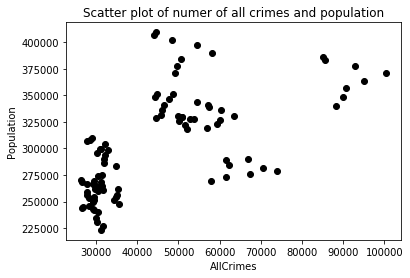

In [20]:
# Visualisation of the relationship between number of crimes and population size/per year.
x = popcrimes['AllCrimes']
y = popcrimes['Population']
plt.scatter(x,y, color = 'black')
plt.xlabel('AllCrimes')
plt.ylabel('Population')
plt.title("Scatter plot of numer of all crimes and population")

Although the scatter plot does not quite show a very strong relationship between the two variables, given the stronger correlation, we will use the frequency of crime rates, as in crime per 100 000 people, rather than the actual number of crimes.

In [69]:
# importing the frequency dataset

crime_freq = pd.read_excel('BerlinCrime_frequency.xlsx')

In [70]:
crime_freq.head()

,year,hood_id,neighborhood,district,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,crime_hood\t
0,2012,10111,Tiergarten Süd,Mitte,556,365,4651,1540,937,17960,143,2603,952,540,127,32,2167,206,1357,8190
1,2012,10112,Regierungsviertel,Mitte,709,316,5171,1342,1549,34941,109,3349,1854,404,109,44,4145,1353,1069,9491
2,2012,10113,Alexanderplatz,Mitte,513,288,3265,962,644,19045,172,1678,1742,583,104,57,3259,1106,922,6586
3,2012,10114,Brunnenstraße Süd,Mitte,203,98,993,235,258,7494,336,751,1549,512,55,20,1674,477,833,2941
4,2012,10221,Moabit West,Mitte,310,122,1502,442,475,5897,224,979,776,384,100,53,1232,153,618,3349


In [71]:
#renaming the column
crime_freq.rename(columns={'crime_hood\t': 'crime_hood'}, inplace=True)

# checking types
crime_freq.dtypes

#summarizing all crimes per district and year

#crime_freq.drop('hood_id', axis=1, inplace=True)
# setting year to index
#crime_freq = crime_freq.reset_index().set_index('year')

#dropping index column
#crime_freq = crime_freq.drop(columns = ['index'])

# assigning a total column 

#crime_freq['Total']= crime_freq.sum(axis=1)

#putting back year as a column
#crime_freq.reset_index(level=0, inplace=True)

year                         int64
hood_id                      int64
neighborhood                object
district                    object
robbery                      int64
street_robbery               int64
injury                       int64
agg_assault                  int64
threat                       int64
theft                        int64
car_theft                    int64
theft_from_car               int64
bike_theft                   int64
burglary                     int64
accidental_fire              int64
arson                        int64
property_damage              int64
property_damage_graffiti     int64
drugs                        int64
crime_hood                   int64
dtype: object

In [72]:
crime_freq.head()

,year,hood_id,neighborhood,district,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,crime_hood
0,2012,10111,Tiergarten Süd,Mitte,556,365,4651,1540,937,17960,143,2603,952,540,127,32,2167,206,1357,8190
1,2012,10112,Regierungsviertel,Mitte,709,316,5171,1342,1549,34941,109,3349,1854,404,109,44,4145,1353,1069,9491
2,2012,10113,Alexanderplatz,Mitte,513,288,3265,962,644,19045,172,1678,1742,583,104,57,3259,1106,922,6586
3,2012,10114,Brunnenstraße Süd,Mitte,203,98,993,235,258,7494,336,751,1549,512,55,20,1674,477,833,2941
4,2012,10221,Moabit West,Mitte,310,122,1502,442,475,5897,224,979,776,384,100,53,1232,153,618,3349


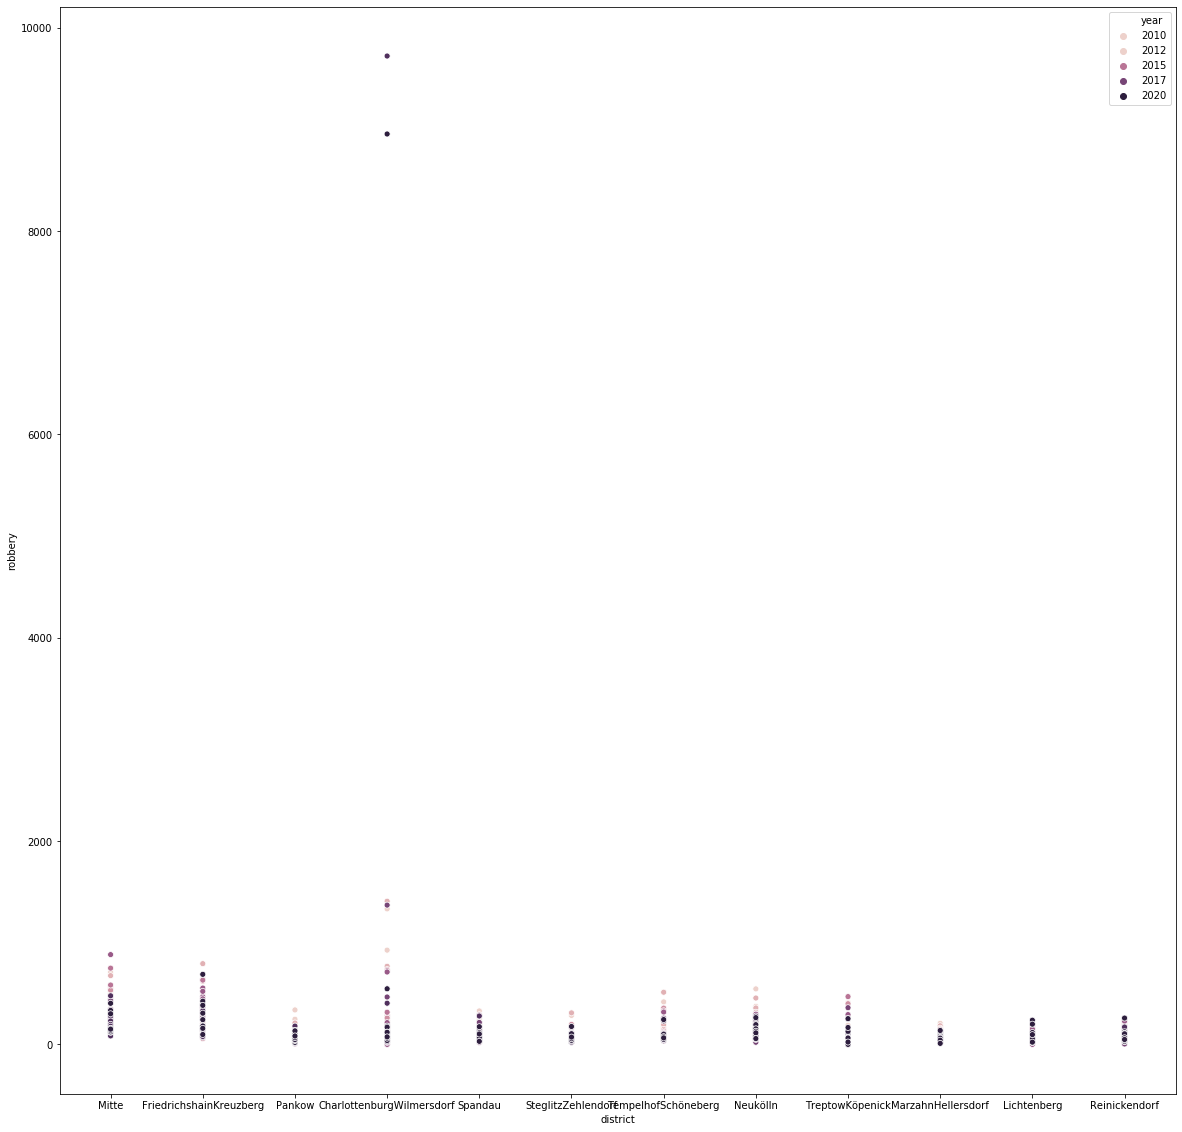

In [81]:
#ploting 
#sns.relplot(x='CO2 Emission Grams/Mile', y='Highway MPG', hue="Fuel Type", size="Fuel Type", data=data)
#fig, ax = pyplot.subplots(figsize=(20,20))
#sns.scatterplot(x='district', y="robbery", hue="year", data=crime_freq)

In [62]:
# finding correlations
correlations = round(crime_freq.corr(),2)
correlations

,year,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,crime_hood,Total
year,1.00,-0.01,0.03,0.01,-0.00,0.02,-0.06,-0.06,-0.08,-0.01,-0.29,0.04,0.05,-0.05,0.04,0.07,-0.01,-0.04
robbery,-0.01,1.00,0.96,0.76,0.67,0.80,0.45,0.45,0.31,0.31,0.18,0.81,0.81,0.59,0.67,0.36,0.81,0.67
street_robbery,0.03,0.96,1.00,0.71,0.69,0.85,0.38,0.44,0.26,0.29,0.21,0.90,0.91,0.60,0.71,0.38,0.80,0.64
injury,0.01,0.76,0.71,1.00,0.94,0.88,0.76,0.59,0.62,0.43,0.08,0.74,0.70,0.84,0.61,0.38,0.97,0.91
agg_assault,-0.00,0.67,0.69,0.94,1.00,0.90,0.79,0.59,0.66,0.50,0.12,0.77,0.72,0.89,0.64,0.50,0.95,0.93
threat,0.02,0.80,0.85,0.88,0.90,1.00,0.63,0.57,0.59,0.37,0.16,0.94,0.91,0.83,0.71,0.37,0.94,0.86
theft,-0.06,0.45,0.38,0.76,0.79,0.63,1.00,0.46,0.78,0.72,0.15,0.43,0.38,0.79,0.51,0.40,0.76,0.93
car_theft,-0.06,0.45,0.44,0.59,0.59,0.57,0.46,1.00,0.60,0.31,0.03,0.49,0.43,0.66,0.31,0.08,0.61,0.60
theft_from_car,-0.08,0.31,0.26,0.62,0.66,0.59,0.78,0.60,1.00,0.47,0.03,0.41,0.33,0.77,0.28,0.18,0.62,0.80
bike_theft,-0.01,0.31,0.29,0.43,0.50,0.37,0.72,0.31,0.47,1.00,0.08,0.27,0.24,0.56,0.50,0.41,0.49,0.65


In [26]:
#district_overview.loc[:,'Total'] = district_overview.sum(axis=1)
#district_overview.append(district_overview.sum().rename('AllCrimes')).assign(AllCrimes=lambda d: d.sum(1))
#do = district_overview.append(district_overview.sum().rename('AllCrimes')).assign(AllCrimes=lambda d: d.sum(1))
#do = do.reset_index(drop=True, inplace=True)
#district_overview.loc[district_overview['Robbery'] == district_overview['Robbery'].max()] 